In [ ]:
import sys
!python -m pip install matplotlib seaborn numpy pandas scikit-learn statsmodels xgboost

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import xgboost

## This dataset contains the hourly and daily count of rental bikes between years 2011 and 2012 in Capital bikeshare system with the corresponding weather and seasonal information.

In [5]:
df_bikes = pd.read_csv("day_bike_sharing.csv")
df_bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [46]:
df_bikes["season"] = df_bikes["season"].astype(float)
df_bikes["yr"] = df_bikes["yr"].astype(float)
df_bikes["mnth"] = df_bikes["mnth"].astype(float)
df_bikes["holiday"] = df_bikes["holiday"].astype(float)
df_bikes["weekday"] = df_bikes["weekday"].astype(float)
df_bikes["workingday"] = df_bikes["workingday"].astype(float)

In [47]:
df_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    float64       
 3   yr          731 non-null    float64       
 4   mnth        731 non-null    float64       
 5   holiday     731 non-null    float64       
 6   weekday     731 non-null    float64       
 7   workingday  731 non-null    float64       
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), float64(10), int64(3)
memory usage: 80.1 KB


In [48]:
df_bikes['yr'].value_counts()

1.0    366
0.0    365
Name: yr, dtype: int64

In [49]:
df_bikes['dteday'] = pd.to_datetime(df_bikes['dteday'], infer_datetime_format = True)

In [50]:
df_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    float64       
 3   yr          731 non-null    float64       
 4   mnth        731 non-null    float64       
 5   holiday     731 non-null    float64       
 6   weekday     731 non-null    float64       
 7   workingday  731 non-null    float64       
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), float64(10), int64(3)
memory usage: 80.1 KB


In [51]:
df_bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,2011-01-01,1.0,0.0,1.0,0.0,6.0,0.0,2,0.344167,0.363625,0.805833,0.160446,985
1,2,2011-01-02,1.0,0.0,1.0,0.0,0.0,0.0,2,0.363478,0.353739,0.696087,0.248539,801
2,3,2011-01-03,1.0,0.0,1.0,0.0,1.0,1.0,1,0.196364,0.189405,0.437273,0.248309,1349
3,4,2011-01-04,1.0,0.0,1.0,0.0,2.0,1.0,1,0.200000,0.212122,0.590435,0.160296,1562
4,5,2011-01-05,1.0,0.0,1.0,0.0,3.0,1.0,1,0.226957,0.229270,0.436957,0.186900,1600


**df_bikes['cnt'] is the number of bike rentals in a given day.**

**According to the dataset, df_bikes['cnt'] is the sum of df_bikes['casual'] and df_bikes['registered'].**
    
*If df_bikes['registered'] and df_bikes['casual'] were included as input columns, predictions would always be 100% accurate since these columns would always sum to the correct result. Although perfect predictions are ideal in theory, it makes no sense to include input columns that would be unknown in reality.*

*All current columns may be used to predict df_bikes['cnt'] except for 'casual' and 'registered', as explained previously. 

**Drop the 'casual' and 'registered' columns using the .drop method as follows:**

In [53]:
df_bikes = df_bikes.drop(['casual', 'registered'], axis = 1)

In [60]:
df_bikes = df_bikes.drop('dteday', axis = 1)

### *Now that we have all numerical columns and no null values*

In [61]:
df_bikes.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1.0,0.0,1.0,0.0,6.0,0.0,2,0.344167,0.363625,0.805833,0.160446,985
1,2,1.0,0.0,1.0,0.0,0.0,0.0,2,0.363478,0.353739,0.696087,0.248539,801
2,3,1.0,0.0,1.0,0.0,1.0,1.0,1,0.196364,0.189405,0.437273,0.248309,1349
3,4,1.0,0.0,1.0,0.0,2.0,1.0,1,0.200000,0.212122,0.590435,0.160296,1562
4,5,1.0,0.0,1.0,0.0,3.0,1.0,1,0.226957,0.229270,0.436957,0.186900,1600


### Salvar os dados 

df_bikes.to_csv('bike_rentals_cleaned.csv', index=False)

The index=False parameter prevents an additional column from being created by the index.

In [62]:
X = df_bikes.iloc[:,:-1]
X

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,1,1.0,0.0,1.0,0.0,6.0,0.0,2,0.344167,0.363625,0.805833,0.160446
1,2,1.0,0.0,1.0,0.0,0.0,0.0,2,0.363478,0.353739,0.696087,0.248539
2,3,1.0,0.0,1.0,0.0,1.0,1.0,1,0.196364,0.189405,0.437273,0.248309
3,4,1.0,0.0,1.0,0.0,2.0,1.0,1,0.200000,0.212122,0.590435,0.160296
4,5,1.0,0.0,1.0,0.0,3.0,1.0,1,0.226957,0.229270,0.436957,0.186900
...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,1.0,1.0,12.0,0.0,4.0,1.0,2,0.254167,0.226642,0.652917,0.350133
727,728,1.0,1.0,12.0,0.0,5.0,1.0,2,0.253333,0.255046,0.590000,0.155471
728,729,1.0,1.0,12.0,0.0,6.0,0.0,2,0.253333,0.242400,0.752917,0.124383
729,730,1.0,1.0,12.0,0.0,0.0,0.0,1,0.255833,0.231700,0.483333,0.350754


In [63]:
y = df_bikes.iloc[:,-1]
y

0       985
1       801
2      1349
3      1562
4      1600
       ... 
726    2114
727    3095
728    1341
729    1796
730    2729
Name: cnt, Length: 731, dtype: int64

In [56]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

In [64]:
# random_state=2, this means that you are choosing the seed 
# of a pseudo-random number generator to ensure reproducible results.

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 2)

In [35]:
#X_train.shape
#y_test.shape

### Linear Regression

In [65]:
# Initialize a machine learning model:
lin_reg = LinearRegression()

In [66]:
type(lin_reg)

sklearn.linear_model._base.LinearRegression

In [67]:
# Fit the model on the training set. 
# This is where the machine learning model is built. 
# Note that X_train is the predictor column and y_train is the target column.

lin_reg.fit(X_train, y_train)

LinearRegression()

In [74]:
# Make predictions for the test set. 
# The predictions of X_test, the predictor columns in the test set, 
# are stored as y_pred using the .predict method on lin_reg:

y_pred = lin_reg.predict(X_test)
type(y_pred)

numpy.ndarray

In [ ]:
# Compare the predictions with the test set. 
# Scoring the model requires a basis of comparison. 
# The standard for linear regression is the root mean squared error (RMSE). 
# The RMSE requires two pieces: mean_squared_error, 
# the sum of the squares of differences between predicted and actual values, 
# and the square root, to keep the units the same. 
# mean_squared_error may be imported, and the square root may be taken 
# with Numerical Python, popularly known as NumPy, a blazingly fast library 
# designed to work with pandas.

In [75]:
# Import mean_squared_error and NumPy, and then compute the mean squared error 
# and take the square root:

from sklearn.metrics import mean_squared_error

In [79]:
mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)

print("RMSE: %0.2f" % (rmse))

RMSE: 898.33


In [ ]:
# It's hard to know whether an error of 898 rentals is good or 
# bad without knowing the expected range of rentals per day.
# With a range of 22 to 8714, a mean of 4504, and 
# a standard deviation of 1937, an RMSE of 898 isn't bad, but it's not great either.

In [80]:
# XGBoost includes a regressor, called XGBRegressor, 
# that may be used on any regression dataset

from xgboost import XGBRegressor

In [81]:
xg_reg = XGBRegressor()
xg_reg.fit(X_train, y_train)
y_pred = xg_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE: %0.2f" % (rmse))

RMSE: 693.03


In [ ]:
# XGBRegressor performs substantially better!

# Cross Validation

### One way to address the score discrepancies between different splits is k-fold cross-validation. The idea is to split the data multiple times into different training sets and test sets, and then to take the mean of the scores. The number of splits, called folds, is denoted by k. It's standard to use k = 3, 4, 5, or 10 splits.

### Choosing the number of folds is flexible and depends on the data. Five folds is standard because 20% of the test set is held back each time. With 10 folds, only 10% of the data is held back; however, 90% of the data is available for training and the mean is less vulnerable to outliers. For a smaller datatset, three folds may work better. 

### At the end, there will be k different scores evaluating the model against k different test sets. Taking the mean score of the k folds gives a more reliable score than any single fold.

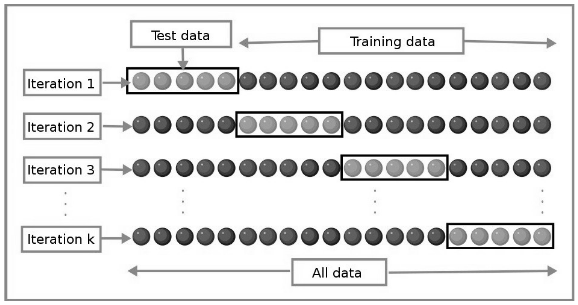 

### Cross-validation with linear regression

In [83]:
from sklearn.model_selection import cross_val_score

In [84]:
# Now use cross-validation to build and score a machine learning model 
# in the following steps:


In [85]:
# Initialize a machine learning model:
model = LinearRegression()

In [86]:
# mplement cross_val_score with the model, X, y, scoring='neg_mean_squared_error', 
# and the number of folds, cv=10, as input:

scores = cross_val_score(model, X, y, scoring = 'neg_mean_squared_error', cv = 10)

Tip

Why scoring='neg_mean_squared_error'? Scikit-learn is designed to select the highest score when training models. This works well for accuracy, but not for errors when the lowest is best. By taking the negative of each mean squared error, the lowest ends up being the highest. 

This is compensated for later with rmse = np.sqrt(-scores), so the final results are positive.

In [91]:
# Find the RMSE by taking the square root of the negative scores:

rmse = np.sqrt(-scores)
print('Reg rmse:', np.round(rmse, 2))
print('RMSE mean: %0.1f' % (rmse.mean()))

Reg rmse: [ 504.07  837.78 1141.97  728.27  640.68  969.64 1132.23 1251.91 1084.35
 1426.3 ]
RMSE mean: 971.7


### Cross-validation with XGBoost

In [92]:
model = XGBRegressor()
scores = cross_val_score(model, X, y, scoring = 'neg_mean_squared_error', cv = 10)
rmse = np.sqrt(-scores)
print('Reg rmse:', np.round(rmse, 2))
print('RMSE mean: %0.2f' % (rmse.mean()))

Reg rmse: [ 652.26  629.81  540.9   680.13  855.02 1025.55  986.15  850.26  909.63
 1552.63]
RMSE mean: 868.24


#### XGBRegressor wins again, besting linear regression by about 10%.